In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [219]:
car=pd.read_csv('quikr_car.csv')

In [221]:
car.sample(10)

,name,company,year,Price,kms_driven,fuel_type
548,Hyundai Getz Prime 1.3 GLX,Hyundai,2009,"1,15,000","20,000 kms",Petrol
481,Toyota Corolla Altis GL Petrol,Toyota,2010,"2,20,000","58,000 kms",Petrol
747,Honda City 1.5 E MT,Honda,2005,"95,000","41,000 kms",Petrol
465,Maruti Suzuki Versa DX2 8 SEATER BSIII,Maruti,2004,"90,000","50,000 kms",Petrol
196,Mahindra Scorpio SLX,Mahindra,2007,"3,55,000","75,000 kms",Diesel
284,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2000,"59,000","56,450 kms",Petrol
311,Maruti Suzuki Dzire,Maruti,2012,"2,99,999","40,000 kms",Petrol
326,Maruti Suzuki Wagon R,Maruti,2016,"3,44,999","15,000 kms",Petrol
17,Audi Q7,Audi,2014,"5,00,000","16,934 kms",Diesel
504,Maruti Suzuki Zen LXi BSII,Maruti,2003,"99,999","53,000 kms",Petrol


In [223]:
car.shape

(892, 6)

In [225]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


##### Creating backup copy

In [228]:
backup=car.copy()

#### year has many non-year values

In [231]:
car=car[car['year'].str.isnumeric()]

#### year is in object. Change to integer

In [234]:
car['year']=car['year'].astype(int)

#### Price has Ask for Price

In [237]:
car=car[car['Price']!="Ask For Price"]

#### Price has commas in its prices and is in object

In [240]:
car['Price']=car['Price'].str.replace(',','').astype(int)

In [242]:
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

#### It has nan values and two rows have 'Petrol' in them

In [245]:
car=car[car['kms_driven'].str.isnumeric()]

In [247]:
car['kms_driven']=car['kms_driven'].astype(int)

#### fuel_type has nan values

In [250]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel


In [252]:
car=car[~car['fuel_type'].isna()]

In [254]:
car.shape

(816, 6)

In [256]:
print("percentage of remaining rows",(817/892)*100)

percentage of remaining rows 91.59192825112108


#### Company does not need any cleaning now. Changing car names. Keeping only the first three words

In [259]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

#### Resetting the index of the final cleaned data

In [262]:
car=car.reset_index(drop=True)

## Cleaned Data

In [265]:
car

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [267]:
car.to_csv('Cleaned Car.csv')

In [269]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int32 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: int32(3), object(3)
memory usage: 28.8+ KB


In [271]:
car.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


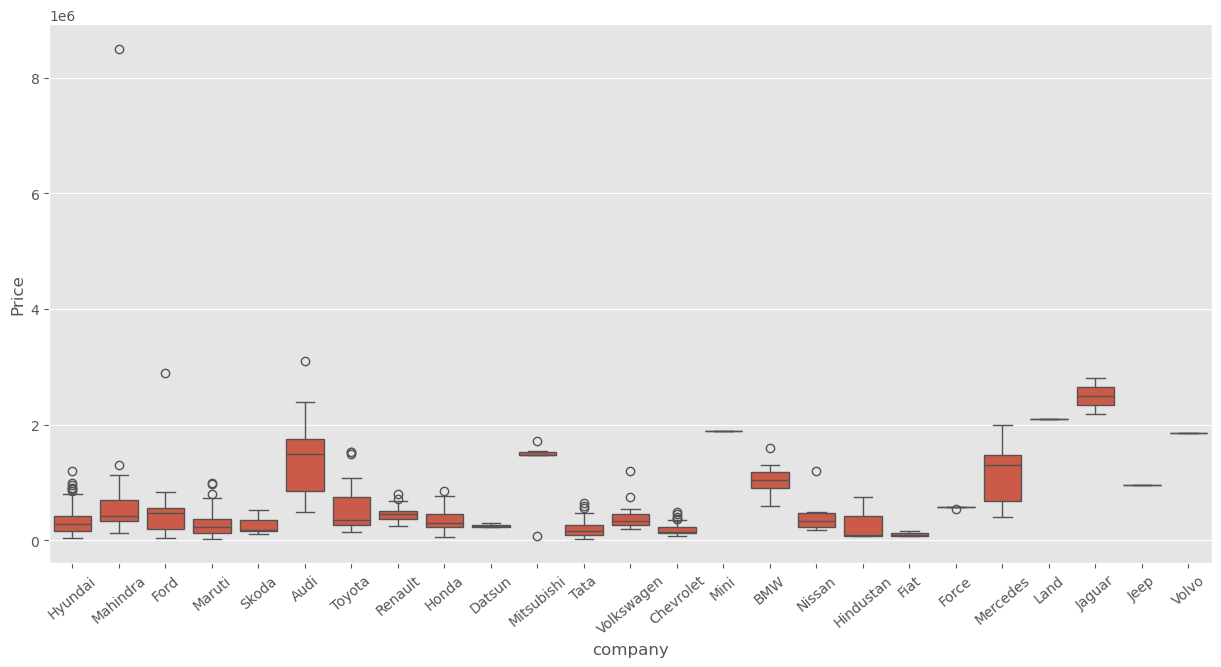

In [273]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.subplots(figsize=(15,7))
ax = sns.boxplot(x='company', y='Price', data=car)

# Rotate x-axis tick labels
ax.tick_params(axis='x', rotation=40, labelsize=10, labelright=False)

plt.show()


### Checking relationship of Year with Price

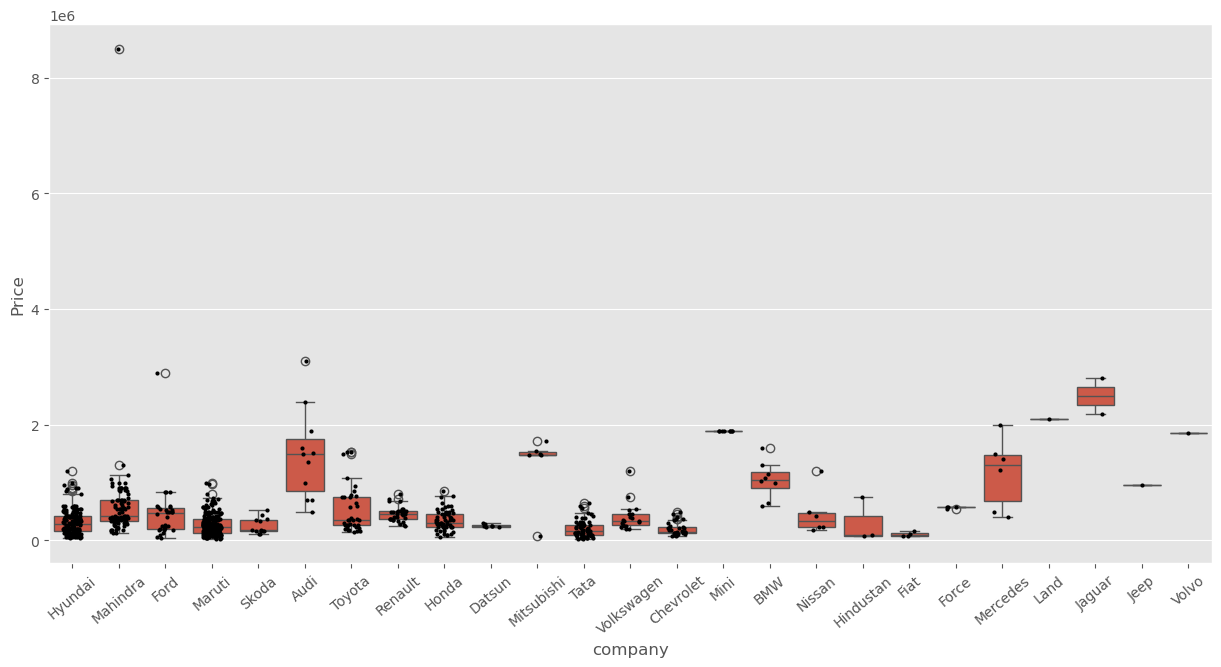

In [276]:
plt.figure(figsize=(15, 7))
ax=sns.boxplot(x='company', y='Price', data=car)
ax=sns.stripplot(x='company', y='Price', data=car, color='black', jitter=0.2, size=3)
ax.tick_params(axis='x', rotation=40, labelsize=10, labelright=False)
plt.show()


### Checking relationship of kms_driven with Price

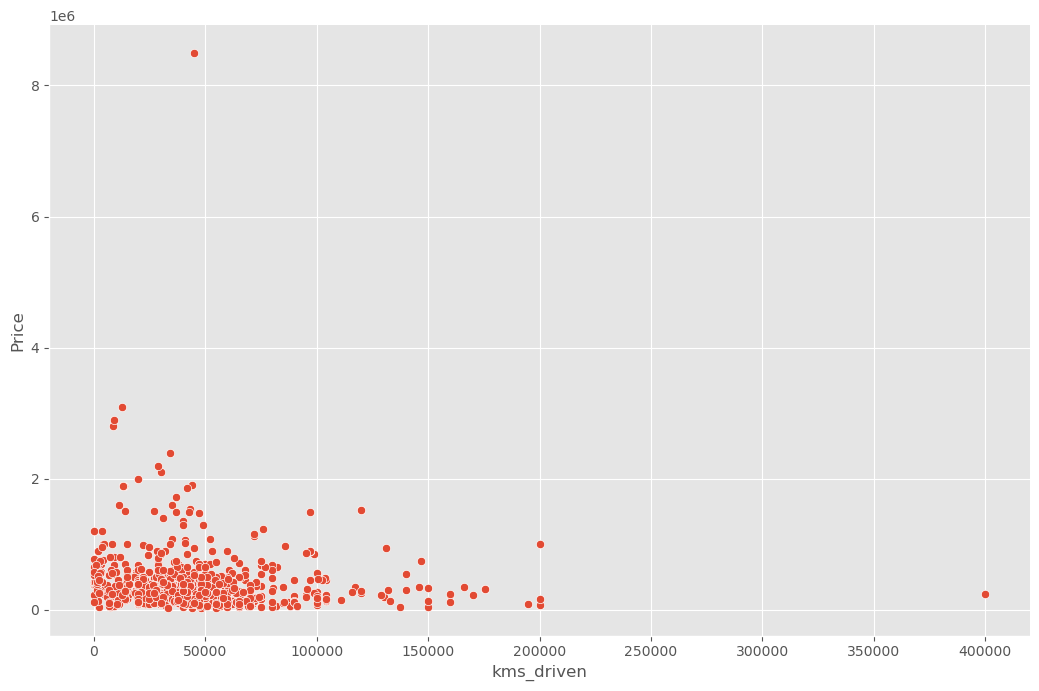

In [279]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)

### Checking relationship of Fuel Type with Price

<Axes: xlabel='fuel_type', ylabel='Price'>

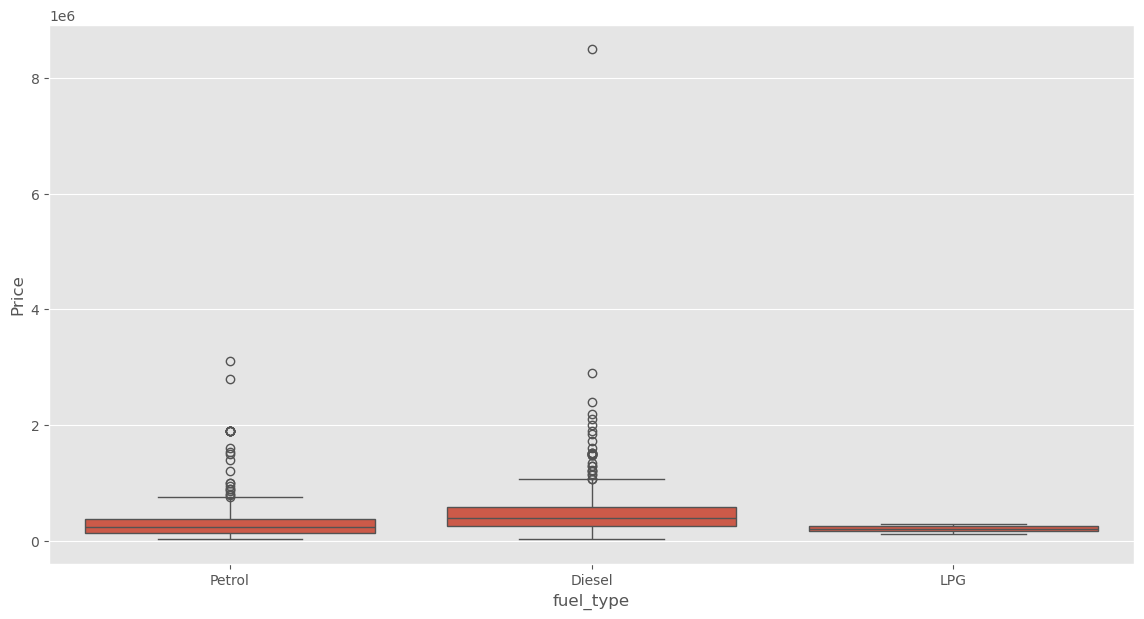

In [282]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car)

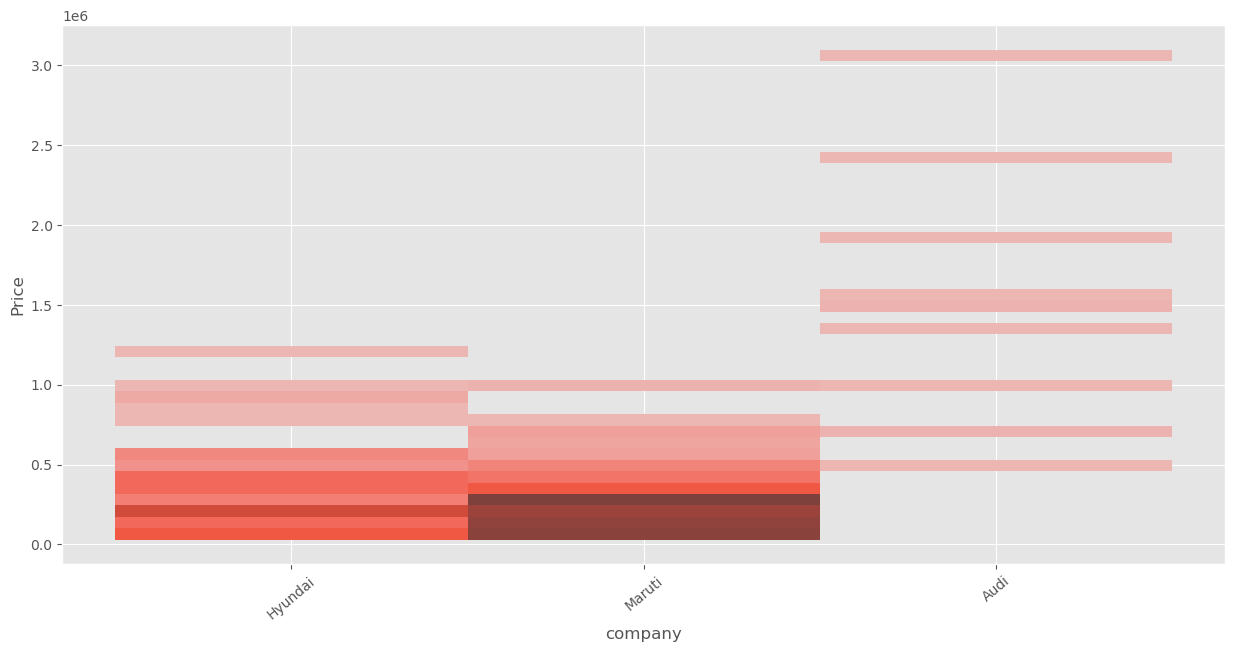

In [284]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


filtered_car = car[car['company'].isin(['Maruti', 'Hyundai', 'Audi'])]

plt.subplots(figsize=(15,7))
ax = sns.histplot(x='company', y='Price', data=filtered_car)

ax.tick_params(axis='x', rotation=40, labelsize=10)

plt.show()


### Relationship of Price with FuelType, Year and Company mixed

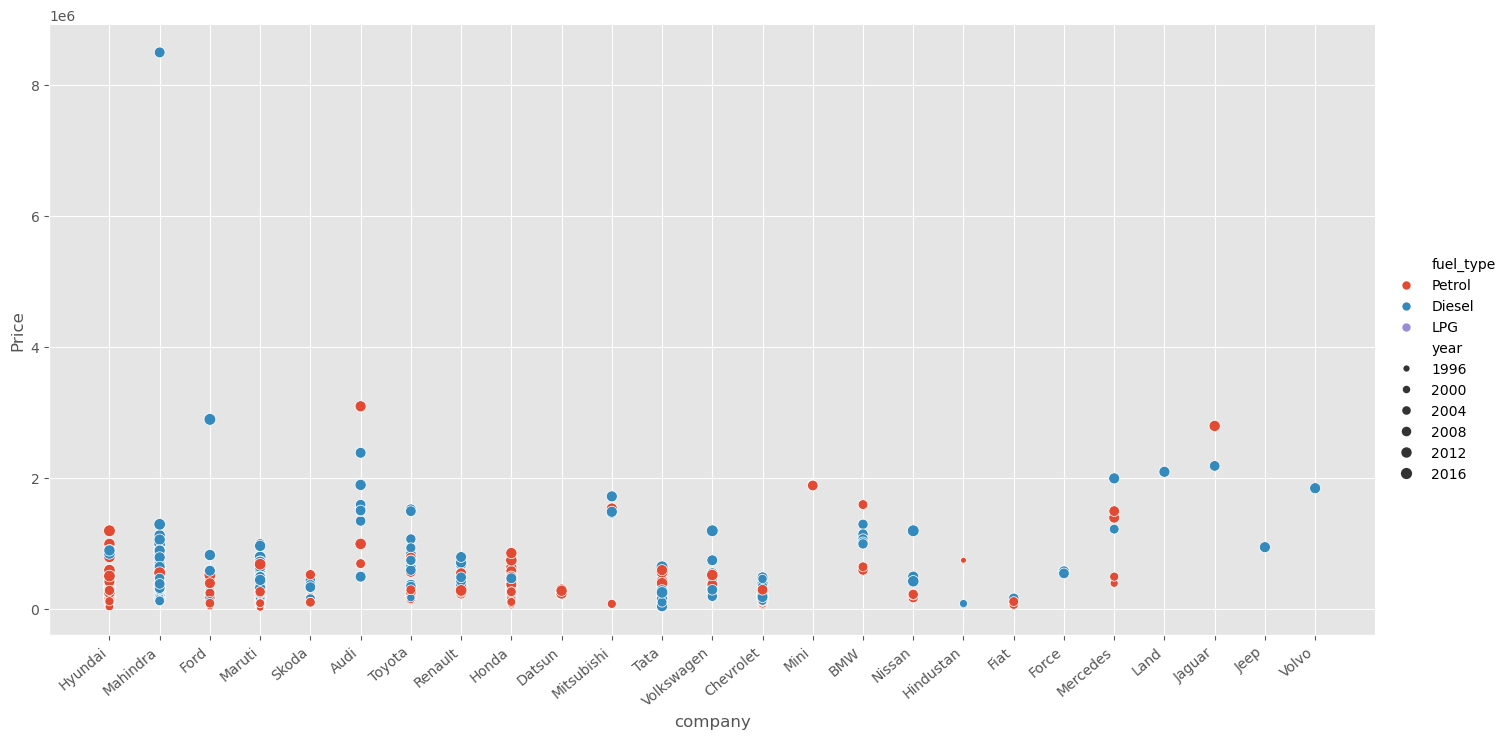

In [287]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

### Extracting Training Data

In [290]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [292]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
811,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
812,Tata Indica V2,Tata,2009,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,132000,Petrol
814,Tata Zest XM,Tata,2018,27000,Diesel


In [294]:
y.shape

(816,)

### Applying Train Test Split

In [297]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [299]:
from sklearn.linear_model import LinearRegression

In [301]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

#### Creating an OneHotEncoder object to contain all the possible categories

In [304]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

#### Creating a column transformer to transform categorical columns

In [307]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

#### Linear Regression Model

In [310]:
lr=LinearRegression()

#### Making a pipeline

In [313]:
pipe=make_pipeline(column_trans,lr)

#### Fitting the  model

In [316]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [318]:
y_pred=pipe.predict(X_test)

#### Checking R2 Score

In [321]:
r2_score(y_test,y_pred)

0.5846522501810879

#### Finding the model with a random state of TrainTestSplit where the model was found to give almost 0.92 as r2_score

In [324]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [325]:
np.argmax(scores)

247

In [326]:
scores[np.argmax(scores)]

0.8604030970613807

In [327]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([453164.61040369])

#### The best model is found at a certain random state 

In [329]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.8604030970613807

In [330]:
import pickle

In [331]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [332]:
pipe.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([454987.63682601])

In [333]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet Beat LT', 'Chevrolet Beat PS',
       'Chevrolet Cruze LTZ', 'Chevrolet Enjoy', 'Chevrolet Enjoy 1.4',
       'Chevrolet Sail 1.2', 'Chevrolet Sail UVA', 'Chevrolet Spark',
       'Chevrolet Spark 1.0', 'Chevrolet Spark LS', 'Chevrolet Spark LT',
       'Chevrolet Tavera LS', 'Chevrolet Tavera Neo', 'Datsun GO T',
       'Datsun Go Plus', 'Datsun Redi GO', 'Fiat Linea Emotion',
       'Fiat Petra ELX', 'Fiat Punto Emotion', 'Force Motors Force',
       'Force Motors One', 'Ford EcoSport', 'Ford EcoSport Ambiente',
       'Ford EcoSport Titanium', 'Ford EcoSport Trend',
       'Ford Endeavor 4x4', 'Ford Fiesta', 'Ford Fiesta SXi', 'Ford Figo',
       'Ford Figo Diese